# Inciso a

El objetivo es encontrar el minimizador de la siguiente función:
  
<br>  

$\Large f = (x1 - 4)^4 + (x2 - 3)^2 + 4\times(x3 + 5)^4$  

<br>
 
<u><div style="font-size:24px;">Datos:</div></u>  
  
En este inciso se cuenta con los valores de los $\alpha$'s y el valor de $x_0 = [4,2,-1]$.
  
<br>
  
<u><div style="font-size:24px;">Procedimiento:</div></u>  
  
- Se utiliza el método del <b>descenso del gradiente</b> para encontrar el punto (o vector) $[x_1, x_2, x_3]$ que minimiza la función $f(x_1, x_2, x_3)$   

<br>
  
<u><div style="font-size:24px;">Algoritmo:</div></u>  

- Se utiliza la siguiente regla para encontrar los valores óptimos de $x$  
    
- $\Large x_{new} = x_{old} - \alpha \nabla f(x_{old})$  
  
- donde <b>$\alpha$</b> es el paso utilizado en el método que define cuan rápido o lento se llega al mínimo.  

<br>
 
<b>NOTA:</b>  Al conocer los valores de los $\alpha$'s y el valor de $x_0$ se procede con los cálculos y se obtiene el punto minimizador objetivo.

## Método del Paso Descendente

In [91]:
def update_x(x_old, alpha_old, grad_old):
    x_new = x_old - (alpha_old * grad_old) 
    return x_new

## Función para evaluar gradiente en punto específico

In [92]:
import numpy as np

def eval_grad(grad_f, x):
    # Evalúa el gradiente en el punto dado en asignando los valores de los símbolos correspondientes
    return np.array([float(g.subs({'x1': x[0], 'x2': x[1], 'x3': x[2]})) for g in grad_f])

## Definición de variables y funciones

In [93]:
from sympy import symbols, diff

# Definir las variables simbólicas
x1, x2, x3 = symbols('x1 x2 x3')

# Definir el número de símbolos usados
num_symbs = 3

# Definir la función objetivo
f = (x1 - 4)**4 + (x2 - 3)**2 + 4*(x3 + 5)**4

# Calcular el gradiente de la función
grad_f = [diff(f, x) for x in (x1, x2, x3)]
grad_f


[4*(x1 - 4)**3, 2*x2 - 6, 16*(x3 + 5)**3]

## Calculando las x(n) de las n iteraciones

In [94]:
# Definir punto inicial y tamaño de los pasos
x0 = np.array([4,2,-1], dtype=float)
alpha = [3.967e-3, 0.5, 16.29] 

# Definir la cantidad de iteraciones
n = 3

# Definir una matriz de los valores de x.
x_matrix = np.vstack([x0] + [np.zeros_like(x0) for _ in range(n)])

# Definir una matriz para almacenar los valores de los gradientes.
grads = np.zeros([n,num_symbs])

# Calcular el gradiente y los nuevos puntos en todas las iteraciones
for i in range(n):

    # Evaluar el gradiente en el punto anterior
    grads[i] = eval_grad(grad_f, x_matrix[i])

    # Calcular el valor del nuevo x
    x_matrix[i+1] = np.round(update_x(x_matrix[i], alpha[i], grads[i]), 4)
    
    if i < (n-1):
        print(f'Iteración #{i+1}:\n' 
              f'X usada = {x_matrix[i]} \n'
              f'Alpha usada = {alpha[i]}\n'
              f'Gradiente usado = {grads[i]}\n'
              f'X calcualda = {x_matrix[i+1]} \n\n')
    else:
        print(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n'
              f'Resultado Final: \n\n'
              f'Iteración #{i+1}:\n' 
              f'X usada = {x_matrix[i]} \n'
              f'Alpha usada = {alpha[i]}\n'
              f'Gradiente usado = {grads[i]}\n'
              f'X calcualda = {x_matrix[i+1]} \n\n')


Iteración #1:
X usada = [ 4.  2. -1.] 
Alpha usada = 0.003967
Gradiente usado = [   0.   -2. 1024.]
X calcualda = [ 4.      2.0079 -5.0622] 


Iteración #2:
X usada = [ 4.      2.0079 -5.0622] 
Alpha usada = 0.5
Gradiente usado = [ 0.         -1.9842     -0.00385027]
X calcualda = [ 4.      3.     -5.0603] 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Resultado Final: 

Iteración #3:
X usada = [ 4.      3.     -5.0603] 
Alpha usada = 16.29
Gradiente usado = [ 0.         0.        -0.0035081]
X calcualda = [ 4.      3.     -5.0032] 




# Inciso b

El objetivo sigue siendo el mismo: encontrar el minimizador de la siguiente función:

<br>

$\Large f(x_1, x_2, x_3) = (x1 - 4)^4 + (x2 - 3)^2 + 4\times(x3 + 5)^4$  

<br>
  
- Se requiere utilizar el método del <b>paso descendente</b> para lograr una convergencia hacia el punto óptimo de forma más eficiente. 
- También se debe utilizar el <b>método de las secantes</b> para encontrar los valores óptimos de $\alpha$ en este proceso.

<br>

<u><div style="font-size:24px;">Datos:</div></u>  
  
Esta vez solo se cuenta con el valor de $x_0 = [4,2,-1]$.

<br>

<u><div style="font-size:24px;">Procedimiento:</div></u>  

1. Se procede a la ejecución del <b>método del paso descendente</b> utilizando el <b>método de las secantes</b> para encontrar los valores de $\alpha$'s que optimizan la función objetivo $\phi(\alpha)$.  

- $\Large \phi(\alpha) = f(x_{k} - \alpha \nabla f(x_{k}))$  
  
- $x_{k}$ --> es el punto (o vector) correspondiente a la iteración $k$. 
  
- $\phi(\alpha)$ es la función a optimizar que depende de $\alpha$ y se utiliza para encontrar los valores de $\alpha$ que minimizan esta función en cada iteración $k$ con el punto (o vector) $x$ correspondiente a esa iteración.

<br>

2. Luego de encontrar el valor óptimo de $\alpha$ mediante el <b>método de las secantes</b> se procede con el algoritmo general del método del <b>descenso del gradiente</b> para encontrar el punto (o vector) $[x_1, x_2, x_3]$ que minimiza la función $f(x_1, x_2, x_3)$.   

<br>
  
<u><div style="font-size:24px;">Algoritmo (Con el método de las secantes):</div></u>  
  
- La ecuación que define como se calcula la próxima $\alpha$ con el <b>método de las secantes </b> en función de dos valores de $\alpha$ anteriores es:
  
- $\Large \alpha_{k+1} = \alpha_{k} - \frac{\phi'(\alpha_{k}) * (\alpha_{k} - \alpha_{(k-1)})}{\phi'(\alpha_{k}) - \phi'(\alpha_{(k-1)})}$
      
- El objetivo es encontrar los alphas que hacen que $\phi'(\alpha)$ tienda a 0.

- $\Large \phi'(\alpha) = -\nabla f(x_{k})^T \times \nabla f(x_{k} - \alpha \nabla f(x_{k}))$   
  
- Se utiliza la siguiente regla para encontrar los valores óptimos de $x$  
    
- $\Large x_{new} = x_{old} - \alpha \nabla f(x_{old})$
  
- $\alpha$ --> es el paso utilizado en el método que define cuan rápido o lento se llega al mínimo.  
  
<br>

<u><div style="font-size:24px;">Algoritmo (Con el método de Newton):</div></u>  
  
- La ecuación que define como se calcula la próxima $\alpha$ con el <b>método de newton </b> en función del valor de $\alpha$ anterior:
  
- $\Large \alpha_{k+1} = \alpha_{k} - \frac{\phi'(\alpha_{k}) } {\phi''(\alpha_{k}) }$
  
- Se utiliza la siguiente regla para encontrar los valores óptimos de $x$  
    
- $\Large x_{new} = x_{old} - \alpha \nabla f(x_{old})$
  
- $\alpha$ --> es el paso utilizado en el método que define cuan rápido o lento se llega al mínimo.  
  
<br>

<b>NOTA:</b> Se procede con los cálculos y se obtienen los valores óptimos de los $\alpha$'s, y las $x$'s correspondientes a esos valores.

## Método de las secantes

### Condiciones inciales

Aquí realizo los siguientes pasos:  
  
1. Defino el punto inicial x0. (Está dado como dato en la orden del problema)
2. Calculo el gradiente en ese punto para comprender comprernder como varía la función correspondiente a cada variable individual.
3. Utilizo un método heurístico para identificar un valor óptimo inicial para alpha0.

In [95]:
# Definir punto inicial y tamaño de los pasos
x0 = np.array([4,2,-1], dtype=float)

# Evaluar el gradiente en el punto inicial
grad0 = eval_grad(grad_f, x0)
print(grad0)

[   0.   -2. 1024.]


### Enocntrar valor inicial de alpha

Basado en este resultado puedo ver que la mayor influencia en la variación está en la variable "x3" por lo tanto elijo un paso de 10^-3 para disminuir considerablemente ese cambio en el valor del gradiente con respecto a x3.

In [96]:
# Creo un arreglo de valores de alpha para a través d eun análsisis heurístico identificar el valor óptimo para alpha0 
alphas_test = np.arange(0.0025, 0.0050, 0.0001) 
"""
    Luego de varias visualizaciones y ajustes en los limites y pasos este es el que mejor permite observar 
    el mínimo del gradiente.
"""

# Arreglo para guardar los valores absolutos de los gradientes calculados.
abs_grad = np.zeros(alphas_test.shape)

# Calcular las normas de los gradientes calculados con diferentes valores de alpha.
i = 0
for a in alphas_test:
    # Calcular la nueva x segun el valor actual de alpha
    x_test = update_x(x0, a, grad0)

    # Evaluar el gradiente en el punto calculado
    grad_test = eval_grad(grad_f, x_test)

    # Calcular la norma del gradiente calculado
    abs_grad[i] = np.linalg.norm(grad_test)
    i += 1

### Grafico los valores de las normas del gradiente evaluado con los valores de alpha para hacer un análisis heurístico.

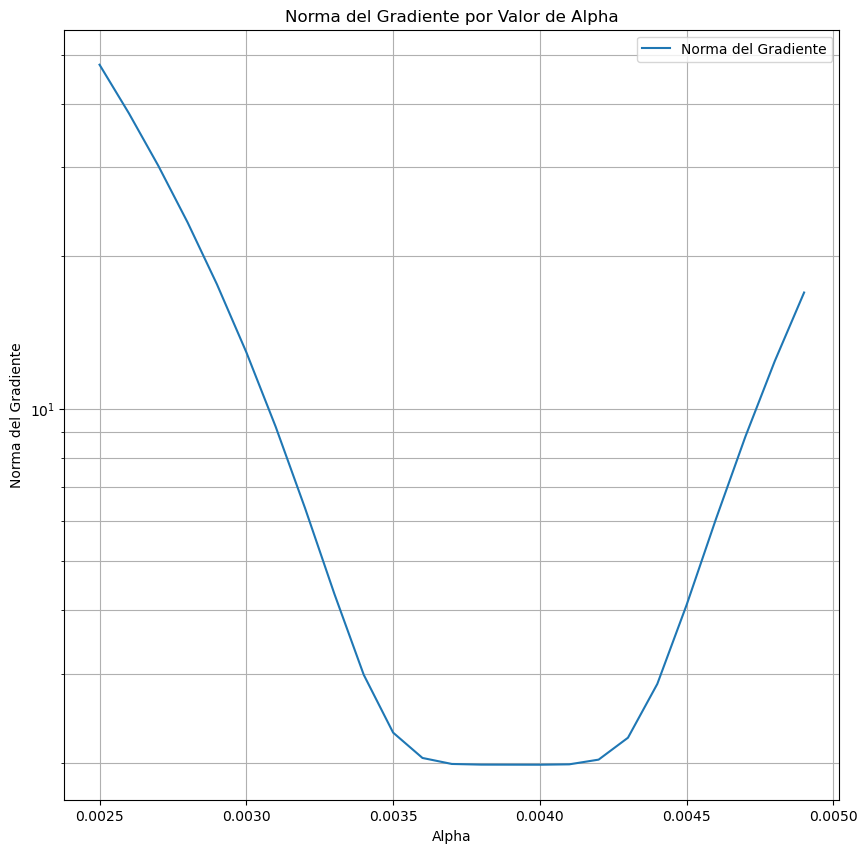

In [97]:
import matplotlib.pyplot as plt

# Graficar
""""
    Utilicé la escala logarítmica para una mejor visualización.
"""
plt.figure(figsize=(10, 10))
plt.plot(alphas_test, abs_grad, label='Norma del Gradiente')
plt.xlabel('Alpha')
plt.ylabel('Norma del Gradiente')
plt.title('Norma del Gradiente por Valor de Alpha')
plt.yscale('log')  # Establecer la escala logarítmica para el eje Y
plt.legend()
plt.grid(True, which="both", ls="-")  # Grid para ambas escalas, lineal y logarítmica
plt.show()

La gráfica muestra que el valor óptimo de alpha0 se encuentra entre 3.5e-3 hasta 4.3e-3.  

### Definición de las función f de forma numérica

In [98]:
# Definición de la función objetivo y el gradiente de forma numérica 
# (Debido a error que no deja utilizar las definidas anteriormente)
def f_numeric(x):
    # Desempaquetar x en sus componentes
    x1, x2, x3 = x
    return (x1 - 4)**4 + (x2 - 3)**2 + 4*(x3 + 5)**4

### Función del método de las secantes para encontrar alpha

In [99]:
import numpy as np
#from scipy.optimize import minimize_scalar

# Implementación del método de las secantes para encontrar alpha
def secant_method_for_alpha(f_numeric, x_old, grad_f_val, alpha0, alpha1, tol=1e-11, max_iter=1000):
    
    """ 
      Definición de la función de optimización:
        
        phi(alpha) = f(x_old - alpha * grad_f_val)
        
        - Se quiere buscar el alpha que haga mínima esta funcion con la x evaluada (en este caso "x_old")
        - Para encontrar el mínimo se necesita evaluar las alphas en la 1ra derivada de la función phi(alpha).

        phi'(alpha) = -grad_f_val * grad_f(x_old - alpha * grad_f_val)
    """
        
    def phi(alpha):
        # Se evalúa el valor de alpha en la 1ra derivada de la función phi(alpha) --> phi'(alpha) 
        return np.dot(-grad_f_val, (eval_grad(grad_f, x_old - alpha * grad_f_val)))

    # Inicialización de variables para el método de las secantes
    alpha_i_minus_one = alpha0
    alpha_i = alpha1
    phi_i_minus_one = phi(alpha_i_minus_one)
    phi_i = phi(alpha_i)

    # Iteraciones del método de las secantes
    for _ in range(max_iter):
        
        # Calculo del siguiente alpha usando la fórmula de las secantes
        alpha_i_plus_one = alpha_i - phi_i * (alpha_i - alpha_i_minus_one) / (phi_i - phi_i_minus_one)

        # Verificación de la condición de parada
        if abs(alpha_i_plus_one - alpha_i) < tol:
            print(f'Alpha óptimo = {np.round(alpha_i,6)} encontrado en iteración #{_} del método de las secantes.\n')
            break

        # Actualizamos las variables para la siguiente iteración
        alpha_i_minus_one = alpha_i
        alpha_i = alpha_i_plus_one
        phi_i_minus_one = phi_i
        phi_i = phi(alpha_i)

        if _== max_iter-1:
            print('El método de las secantes recorrió todas las iteraciones sin encontar el óptimo \n')

    return np.round(alpha_i, 5)

### Cálculo de las alpha y los puntos X desconocidos.

In [100]:
# Punto inicial
x_old = np.array([4.0,2.0, -1.0])

# Valores iniciales para el método de las secantes
alpha_minus2 = 1.e-5     # Valor random elegido como el segundo anterior al alpha0.
alpha_minus1 = 3.1e-2    # Valor elegido como el inmediato anterior al alpha0. 

# Definir la cantidad de iteraciones
n = 5

# Definir una matriz de los valores de x.
x_matrix = np.vstack([x_old] + [np.zeros_like(x_old) for _ in range(n)])

# Definir una matriz para almacenar los valores de los gradientes.
grads = np.zeros([n,num_symbs])

# Definir una matriz para almacenar los valores de las alphas.
alphas = [alpha_minus2, alpha_minus1]

# Calcular el gradiente y los nuevos puntos en todas las iteraciones
for i in range(n):

    print(f'Iteración #{i+1}:\n')

    # Evaluar el gradiente en el punto anterior
    grads[i] = eval_grad(grad_f, x_matrix[i])

    # Cálculo del alpha óptimo mediante el método de las secantes.
    alpha_new = secant_method_for_alpha(f_numeric, x_matrix[i], grads[i], alphas[i], alphas[i+1])
    alphas.append(alpha_new)

    # Calcular el valor del nuevo x
    x_matrix[i+1] = np.round(update_x(x_matrix[i], alphas[i+2], grads[i]), 4)

    #print(f'Iteración #{i+1}: \ngrad = {grads[i]}\nx = {x_matrix[i]} \nalphas = {alphas[1:]}\n')

    if np.linalg.norm(grads[i]) > 1.0e-2:
        print(f'X usada = {x_matrix[i]} \n'
              f'Alphas usadas en secante = {alphas[i:(i+2)]}\n'
              f'Alpha calculada usada en x_update = {alpha_new}\n'
              f'Gradiente usado = {grads[i]}\n'
              f'X calcualda = {x_matrix[i+1]} \n'
              '----------------------------------------------------------------------------------\n')
    else:
        print(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n'
            f'El método convergió en la Iteración #{i+1}: \n'
            f'Con un gradiente = {grads[i]}\n'
            f'Con un vector X = {x_matrix[i]} \n'
            f'Y con {len(alphas[2:])} alphas = {np.round(alphas[2:], 5)}\n')
        break

Iteración #1:

Alpha óptimo = 0.003967 encontrado en iteración #32 del método de las secantes.

X usada = [ 4.  2. -1.] 
Alphas usadas en secante = [1e-05, 0.031]
Alpha calculada usada en x_update = 0.00397
Gradiente usado = [   0.   -2. 1024.]
X calcualda = [ 4.      2.0079 -5.0653] 
----------------------------------------------------------------------------------

Iteración #2:

Alpha óptimo = 0.500002 encontrado en iteración #2 del método de las secantes.

X usada = [ 4.      2.0079 -5.0653] 
Alphas usadas en secante = [0.031, 0.00397]
Alpha calculada usada en x_update = 0.5
Gradiente usado = [ 0.         -1.9842     -0.00445512]
X calcualda = [ 4.      3.     -5.0631] 
----------------------------------------------------------------------------------

Iteración #3:

Alpha óptimo = 15.697168 encontrado en iteración #95 del método de las secantes.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
El método convergió en la Iteración #3: 
Con un gradiente = [ 0.          0.    

### Guardar alphas y vectores x para el próximo inciso

In [101]:
inc_c_alphas = alphas[2:]
inc_c_xs = x_matrix[:(len(x_matrix)-2)]
inc_c_alphas, inc_c_xs

([0.00397, 0.5, 15.69717],
 array([[ 4.    ,  2.    , -1.    ],
        [ 4.    ,  2.0079, -5.0653],
        [ 4.    ,  3.    , -5.0631],
        [ 4.    ,  3.    , -5.    ]]))

## Resultados Inciso b

Logré obtener valores de $\alpha$'s aproximados a los dados en el Inciso a.

## Método de Newton (No está terminado)

### Definición de la función

In [102]:
# Definir las variables simbólicas
x1, x2, x3 = symbols('x1 x2 x3')

# Definir la función objetivo
f = (x1 - 4)**4 + (x2 - 3)**2 + 4*(x3 + 5)**4

### Evaluar punto x (vector [x1,x2,x3]) en 1ra derivada

### Definición de las derivadas

In [103]:
# from sympy import symbols, diff, hessian, Matrix

# # Punto inicial
# x0 = [4,2,-1]

# # Calcular el gradiente de la función
# grad_f = Matrix([diff(f, x) for x in (x1, x2, x3)])

# # Calcular la matriz Hessiana de la función
# hessian_f = hessian(f, (x1, x2, x3))

# grad_f, hessian_f

### Newton 

In [104]:
# # Ajustamos la función para asegurarnos de que la conversión de tipos sea correcta
# def eval_at_point(grad_f, hessian_f, x_values):
#     # Evalúa el gradiente y la Hessiana en el punto dado sustituyendo los valores de x1, x2, x3
#     grad_evaluated = grad_f.subs({x1: x_values[0], x2: x_values[1], x3: x_values[2]}).evalf()
#     hessian_evaluated = hessian_f.subs({x1: x_values[0], x2: x_values[1], x3: x_values[2]}).evalf()
#     # Convertimos los resultados a arreglos de numpy para cálculos numéricos
#     grad_evaluated = np.array(grad_evaluated).astype(np.float64).flatten()
#     hessian_evaluated = np.array(hessian_evaluated).astype(np.float64)
#     return grad_evaluated, hessian_evaluated

# # Reajustamos la función de Newton para usar correctamente las operaciones de numpy
# def newton_step_for_alpha(alpha, x_k, grad_f, hessian_f):
#     # Evaluar el gradiente y la Hessiana en el punto x_k
#     grad_at_xk, _ = eval_at_point(grad_f, hessian_f, x_k)
    
#     # Evaluar la función phi' para el alpha actual
#     x_new = x_k - alpha * grad_at_xk
#     grad_at_xnew, hessian_at_xnew = eval_at_point(grad_f, hessian_f, x_new)
#     phi_prime = -grad_at_xk @ grad_at_xnew
    
#     # Evaluar la función phi'' para el alpha actual
#     phi_double_prime = grad_at_xk @ (hessian_at_xnew @ grad_at_xk)
    
#     # Calcular el siguiente paso de alpha
#     alpha_next = alpha - (phi_prime / phi_double_prime)
#     return alpha_next.item()  # Convertir el resultado a un escalar Python

# # Intentemos de nuevo el paso de Newton
# newton_step_for_alpha(alpha0, x0, grad_f, hessian_f)


# Inciso c

## Condiciones Iniciales

In [105]:
# Calcular los gradientes
grad0 = eval_grad(grad_f, inc_c_xs[0])
grad1 = eval_grad(grad_f, inc_c_xs[1])
grad2 = eval_grad(grad_f, inc_c_xs[2])

## Alpha 0

In [110]:
# Arreglo de valores de alpha0 
alphas0 = np.arange(0.001, 0.01, 0.0001) 

# Arreglo para guardar los valores de la función evaluada con los alpha correspondientes.
func_values0 = np.zeros(alphas0.shape)

for i, alpha in enumerate(alphas0):
    x_test = update_x(inc_c_xs[0], alpha, grad0)
    func_values0[i] = f_numeric(x_test)

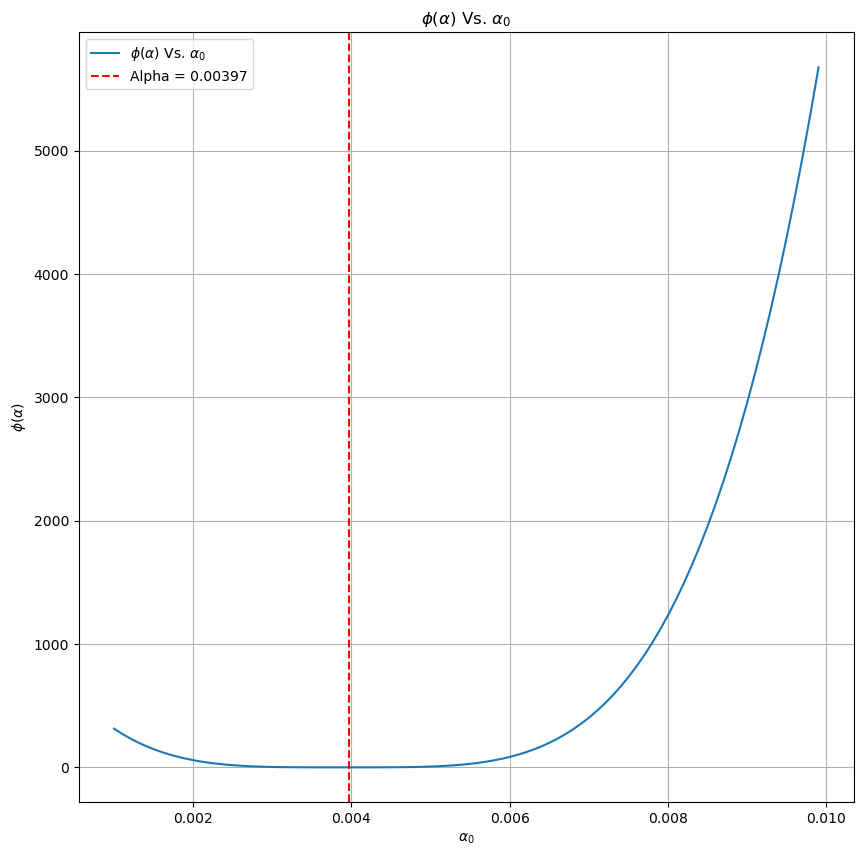

In [111]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(10, 10))
plt.plot(alphas0, func_values0, label=r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_0$')
plt.axvline(x=inc_c_alphas[0], color='r', linestyle='--', label=f'Alpha = {inc_c_alphas[0]}')  # Línea vertical en x=valor_x
plt.xlabel(r'$\alpha_0$')
plt.ylabel(r'$\phi (\alpha)$' )
plt.title(r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_0$')
plt.legend()
plt.grid(True)  # Grid para ambas escalas, lineal y logarítmica
plt.show()

## Alpha 1

In [112]:
# Arreglo de valores de alpha1 
alphas1 = np.arange(0.01, 1, 0.01) 

# Arreglo para guardar los valores de la función evaluada con los alpha correspondientes.
func_values1 = np.zeros(alphas1.shape)

for i, alpha in enumerate(alphas1):
    x_test = update_x(inc_c_xs[1], alpha, grad1)
    func_values1[i] = f_numeric(x_test)

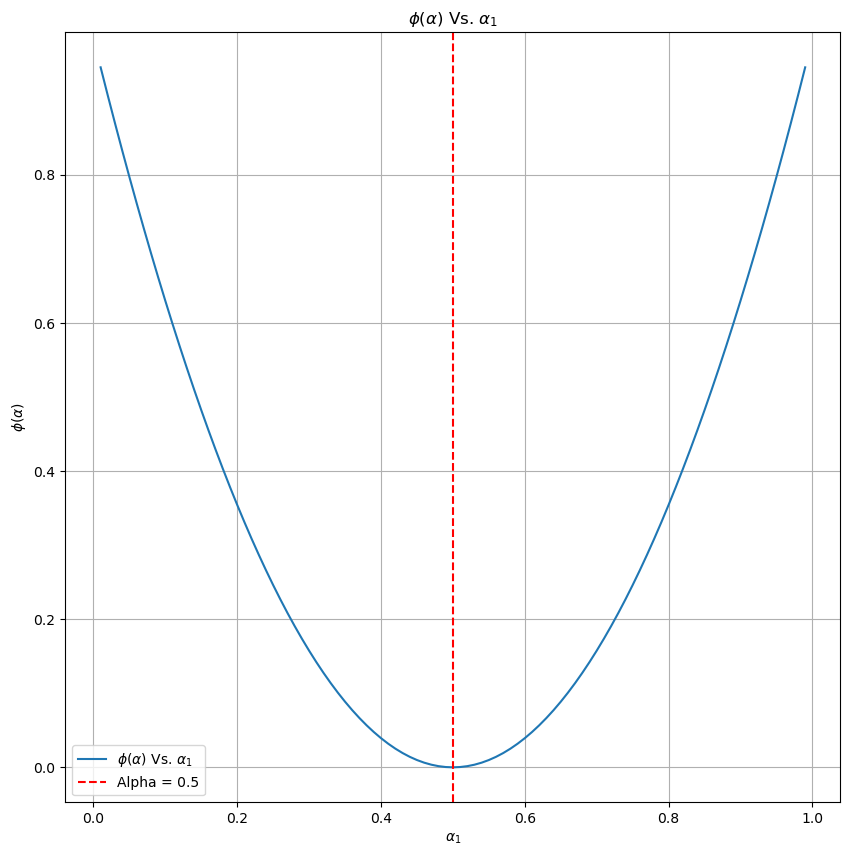

In [113]:
# Graficar
plt.figure(figsize=(10, 10))
plt.plot(alphas1, func_values1, label=r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_1$')
plt.axvline(x=inc_c_alphas[1], color='r', linestyle='--', label=f'Alpha = {inc_c_alphas[1]}')  # Línea vertical en x=valor_x
plt.xlabel(r'$\alpha_1$')
plt.ylabel(r'$\phi (\alpha)$' )
plt.title(r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_1$')
plt.legend()
plt.grid(True)  # Grid para ambas escalas, lineal y logarítmica
plt.show()

## Alpha 2

In [114]:
# Arreglo de valores de alpha1 
alphas2 = np.arange(10, 21, 1) 

# Arreglo para guardar los valores de la función evaluada con los alpha correspondientes.
func_values2 = np.zeros(alphas2.shape)

for i, alpha in enumerate(alphas2):
    x_test = update_x(inc_c_xs[2], alpha, grad2)
    func_values2[i] = f_numeric(x_test)

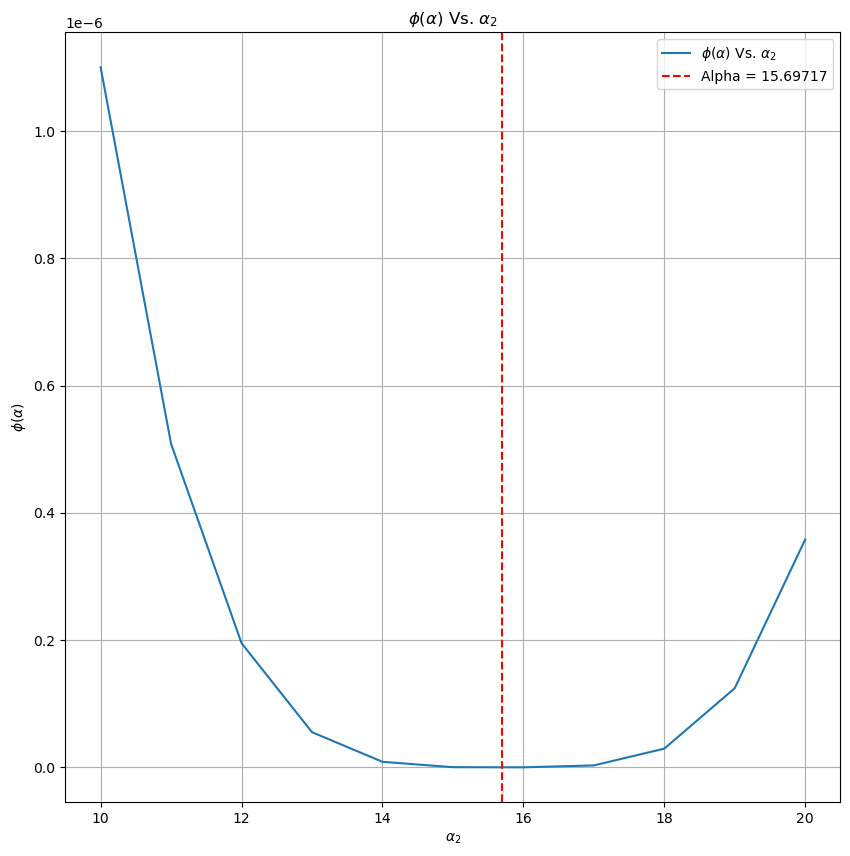

In [115]:
# Graficar
plt.figure(figsize=(10, 10))
plt.plot(alphas2, func_values2, label=r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_2$')
plt.axvline(x=inc_c_alphas[2], color='r', linestyle='--', label=f'Alpha = {inc_c_alphas[2]}')  # Línea vertical en x=valor_x
plt.xlabel(r'$\alpha_2$')
plt.ylabel(r'$\phi (\alpha)$' )
plt.title(r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_2$')
plt.legend()
plt.grid(True)  # Grid para ambas escalas, lineal y logarítmica
plt.show()